<a href="https://colab.research.google.com/github/rul124/Capstone-MSED/blob/main/Wav2Vec_Base_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

1.12.1+cu113
0.12.1+cu113
cpu


In [4]:
bundle = torchaudio.pipelines.WAV2VEC2_BASE
model = bundle.get_model().to(device)

print(model.__class__)

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960.pth


  0%|          | 0.00/360M [00:00<?, ?B/s]

<class 'torchaudio.models.wav2vec2.model.Wav2Vec2Model'>


In [5]:
bundle.sample_rate

16000

### Feature Preparation

In [6]:
# Define path to datasets
DATA_NATURAL = "/content/drive/MyDrive/MESD/MESD_All"
entries = os.listdir(DATA_NATURAL)
print("First:", entries[0])

First: Anger_C_B_alterado.wav


In [ ]:
sample_file = DATA_NATURAL + "/" + entries[0]
print("Sample file is:", sample_file)
sample_wave, sr = torchaudio.load(sample_file)
sample_wave = sample_wave.to(device)
if sr != bundle.sample_rate:
    sample_wave = torchaudio.functional.resample(sample_wave, sr, bundle.sample_rate)

with torch.inference_mode():
    features, _ = model.extract_features(sample_wave)

Sample file is: /content/drive/MyDrive/MESD/MESD_All/Anger_C_B_alterado.wav


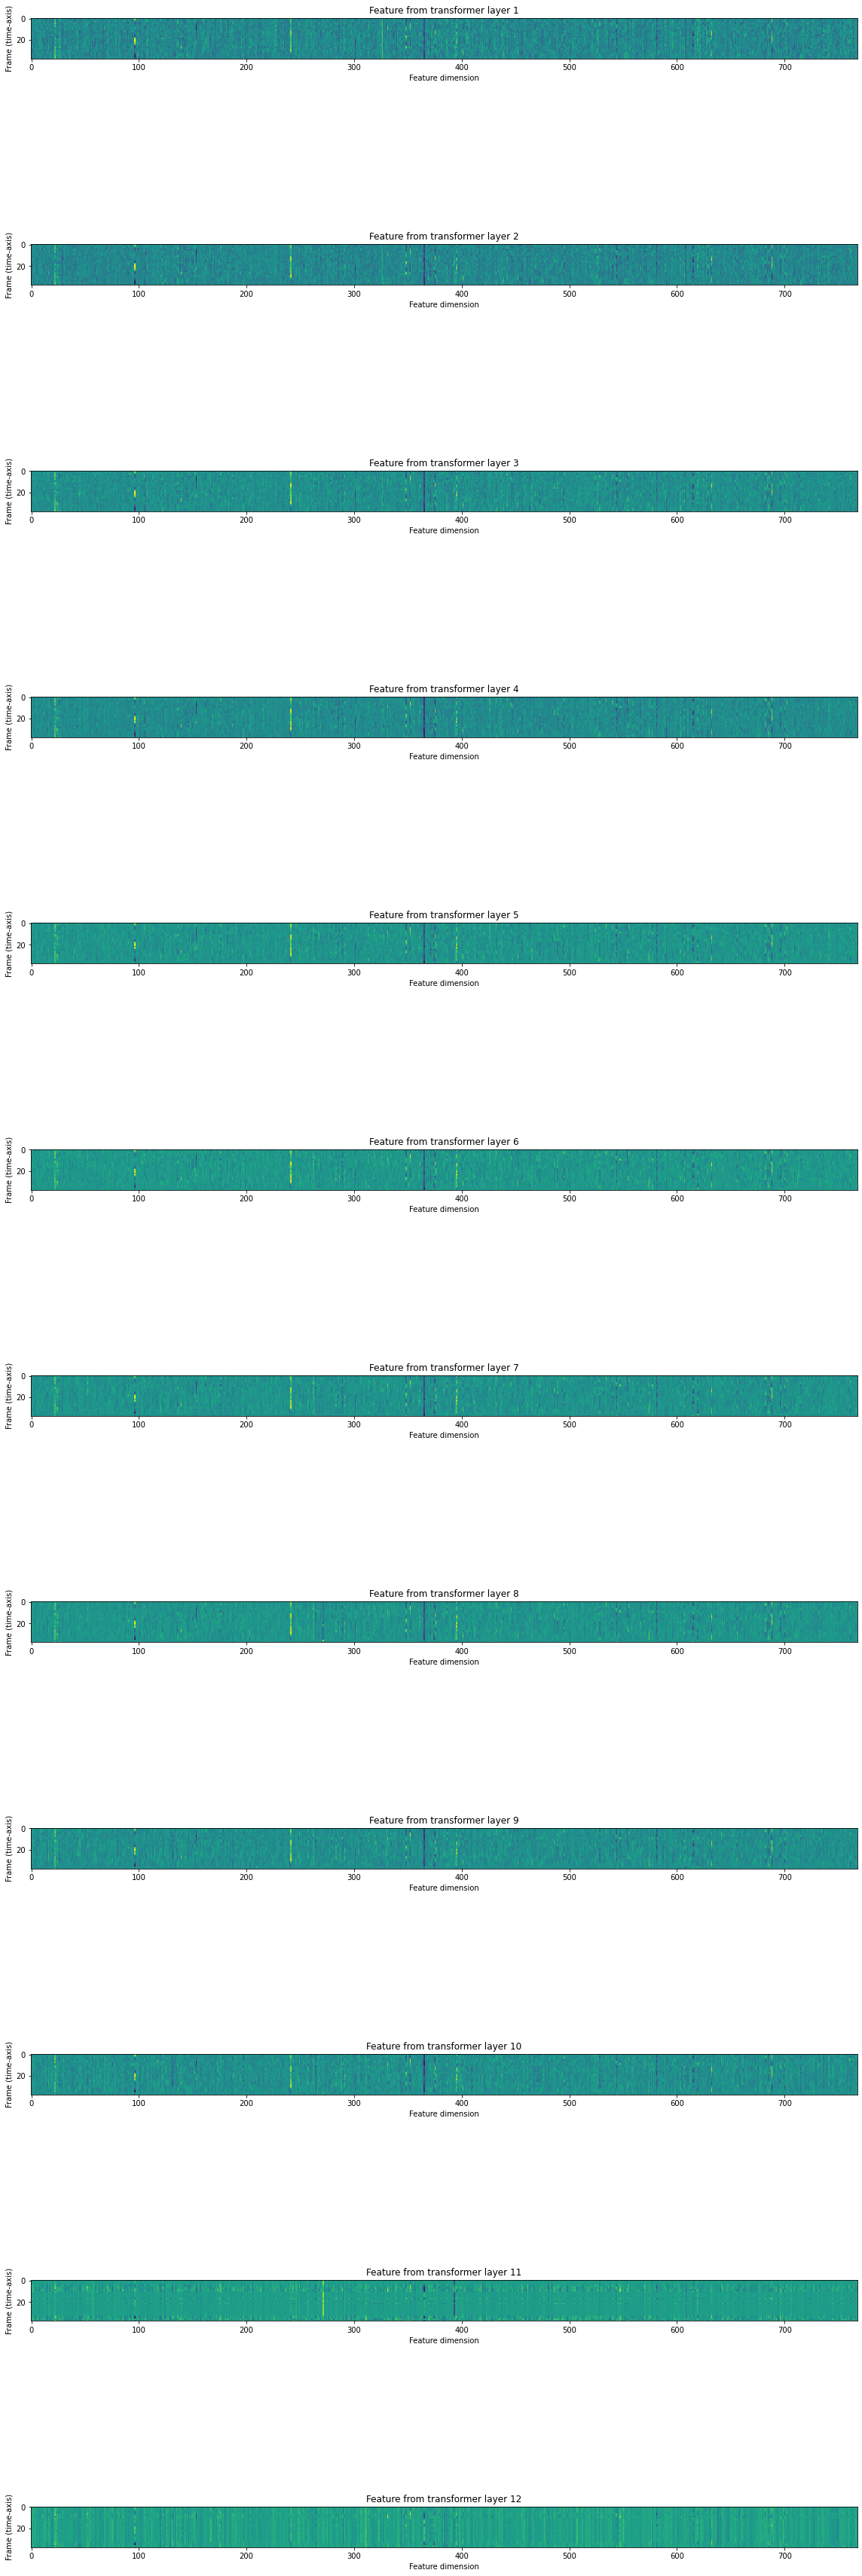

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(features), 1, figsize=(16, 4.3 * len(features)))
for i, feats in enumerate(features):
    ax[i].imshow(feats[0].cpu(), interpolation="nearest")
    ax[i].set_title(f"Feature from transformer layer {i+1}")
    ax[i].set_xlabel("Feature dimension")
    ax[i].set_ylabel("Frame (time-axis)")
plt.tight_layout()
plt.show()

In [17]:
audios = [[] for i in range(12)]
labels = []

from tqdm import tqdm

for i in tqdm(range(len(entries))):
    entry = entries[i]
    path = DATA_NATURAL + "/" + entry
    if "wav" not in path:
      continue
    label = entry.split("_")[0].lower()
    labels.append(label)
    wave, sr = torchaudio.load(path)
    wave = wave.to(device)
    if sr != bundle.sample_rate:
      wave = torchaudio.functional.resample(wave, sr, bundle.sample_rate)
    with torch.inference_mode():
      features, _ = model.extract_features(wave)
    for j in range(12):
      audios[j].append(features[j][0])

100%|██████████| 863/863 [03:59<00:00,  3.60it/s]


In [18]:
columns = {}
columns['Label'] = labels
for i in range(12):
  column_name = "layer_"+str(i+1)
  columns[column_name] = audios[i]
df = pd.DataFrame(columns)
len(df)

862

In [19]:
df[:5]

,Label,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11,layer_12
0,anger,"[[tensor(-0.0990), tensor(-0.0805), tensor(-0....","[[tensor(-0.4365), tensor(-0.0523), tensor(0.3...","[[tensor(0.0298), tensor(-0.0467), tensor(0.29...","[[tensor(0.1392), tensor(0.0206), tensor(0.380...","[[tensor(0.2056), tensor(0.0893), tensor(0.060...","[[tensor(-0.0151), tensor(0.0700), tensor(-0.0...","[[tensor(-0.1014), tensor(-0.1414), tensor(-0....","[[tensor(-0.1294), tensor(-0.2240), tensor(-0....","[[tensor(-0.0800), tensor(0.0616), tensor(0.06...","[[tensor(0.3710), tensor(0.0685), tensor(-0.12...","[[tensor(0.1963), tensor(0.2313), tensor(0.300...","[[tensor(0.2667), tensor(0.2696), tensor(0.196..."
1,anger,"[[tensor(0.1785), tensor(-0.0085), tensor(-0.1...","[[tensor(0.3338), tensor(0.0806), tensor(0.154...","[[tensor(0.1061), tensor(0.0173), tensor(-0.00...","[[tensor(0.0704), tensor(0.2015), tensor(0.016...","[[tensor(0.1325), tensor(0.3352), tensor(0.083...","[[tensor(0.1562), tensor(-0.0157), tensor(-0.1...","[[tensor(-0.0453), tensor(0.1581), tensor(-0.3...","[[tensor(0.0802), tensor(0.2791), tensor(0.010...","[[tensor(-0.1904), tensor(0.2146), tensor(0.26...","[[tensor(-0.0095), tensor(0.3516), tensor(0.19...","[[tensor(0.2278), tensor(0.1739), tensor(0.267...","[[tensor(0.1141), tensor(0.2761), tensor(0.205..."
2,anger,"[[tensor(-0.1424), tensor(-0.2494), tensor(-0....","[[tensor(-0.0516), tensor(-0.2950), tensor(-0....","[[tensor(0.0659), tensor(-0.2404), tensor(0.16...","[[tensor(0.4731), tensor(0.1316), tensor(-0.08...","[[tensor(0.4721), tensor(-0.0460), tensor(-0.0...","[[tensor(0.1151), tensor(-0.0757), tensor(-0.0...","[[tensor(0.2344), tensor(-0.1063), tensor(-0.2...","[[tensor(0.3125), tensor(0.2922), tensor(-0.24...","[[tensor(0.3184), tensor(0.0588), tensor(-0.02...","[[tensor(0.4365), tensor(0.2454), tensor(-0.19...","[[tensor(0.3660), tensor(0.2428), tensor(0.244...","[[tensor(0.2836), tensor(0.1699), tensor(0.011..."
3,anger,"[[tensor(-0.1706), tensor(0.2197), tensor(-0.0...","[[tensor(0.1677), tensor(-0.0012), tensor(-0.3...","[[tensor(0.0908), tensor(0.1264), tensor(-0.13...","[[tensor(0.2274), tensor(-0.0061), tensor(-0.2...","[[tensor(0.5271), tensor(0.0646), tensor(0.029...","[[tensor(0.2446), tensor(-0.1594), tensor(-0.2...","[[tensor(0.2729), tensor(0.1024), tensor(-0.13...","[[tensor(-0.0691), tensor(0.2165), tensor(-0.0...","[[tensor(0.1477), tensor(0.3131), tensor(0.164...","[[tensor(0.3431), tensor(0.0675), tensor(-0.09...","[[tensor(0.1925), tensor(0.1928), tensor(0.313...","[[tensor(0.3971), tensor(0.3364), tensor(0.160..."
4,anger,"[[tensor(-0.2283), tensor(0.0664), tensor(-0.3...","[[tensor(-0.3269), tensor(-0.2088), tensor(0.2...","[[tensor(-0.0643), tensor(-0.1179), tensor(0.4...","[[tensor(0.1756), tensor(0.2451), tensor(0.275...","[[tensor(0.4400), tensor(0.1662), tensor(-0.01...","[[tensor(-0.0217), tensor(0.0973), tensor(-0.0...","[[tensor(-0.0348), tensor(0.0967), tensor(-0.0...","[[tensor(-0.2694), tensor(0.0875), tensor(-0.0...","[[tensor(-0.1196), tensor(0.0895), tensor(-0.0...","[[tensor(0.2888), tensor(0.2120), tensor(-0.15...","[[tensor(0.1757), tensor(0.1762), tensor(0.306...","[[tensor(0.1937), tensor(0.1171), tensor(0.258..."


In [20]:
df.columns

Index(['Label', 'layer_1', 'layer_2', 'layer_3', 'layer_4', 'layer_5',
       'layer_6', 'layer_7', 'layer_8', 'layer_9', 'layer_10', 'layer_11',
       'layer_12'],
      dtype='object')

In [21]:
# Save dataframe into a pickle file
DF_PATH = "/content/drive/MyDrive/MESD/wave2vecbase_features_all.pkl"
df.to_pickle(DF_PATH)

In [83]:
# test load pickle file
df = pd.read_pickle(DF_PATH)

In [22]:
class MyDataSet(torch.utils.data.Dataset):
    def __init__(self, data, label, label_transform):
        super(MyDataSet).__init__()
        self.data = data
        self.label = label
        self.label_transform = label_transform
        
    def __getitem__(self, idx):
        audio = self.data[idx]
        label = self.label_transform[self.label[idx]]
        length = self.data[idx].size(0)
        return audio, length, label
    
    def __len__(self):
        return len(self.label)

In [40]:
categories = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'neutral']
cate_dic = {}
for i, cate in enumerate(categories):
    cate_dic[cate] = i
cate_dic

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'sadness': 4,
 'neutral': 5}

In [24]:

def collate_indic(data):

    _, lengths, labels = zip(*data)
    max_len = max(lengths)
    n_ftrs = data[0][0].size(1)
    features = torch.zeros((len(data), max_len, n_ftrs))
    labels = torch.tensor(labels)
    lengths = torch.tensor(lengths)

    for i in range(len(data)):
        j, k = data[i][0].size(0), data[i][0].size(1)
        features[i] = torch.cat([data[i][0], torch.zeros((max_len - j, k))])

    return features, lengths, labels

In [26]:
layers_name = ['layer_1', 'layer_2', 'layer_3', 'layer_4', 'layer_5',
               'layer_6', 'layer_7', 'layer_8', 'layer_9', 'layer_10', 
               'layer_11', 'layer_12']

In [36]:
print("Length of audios",len(audios[0]))
print("Shape of first:",audios[0][0].shape)
print("Shape of last:",audios[0][-1].shape)

Length of audios 862
Shape of first: torch.Size([38, 768])
Shape of last: torch.Size([43, 768])


### Data Visualization -- TSNE

In [45]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
len(audios[0])

num_to_cate = {'anger': 'angry',
 'happiness': 'happy',
 'sadness': 'sad',
 'neutral': 'neutral'}

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


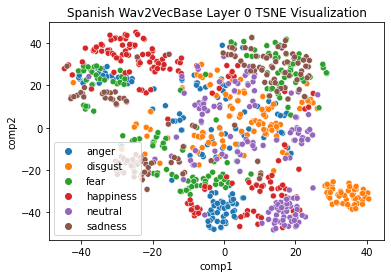

  8%|▊         | 1/12 [00:08<01:31,  8.32s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


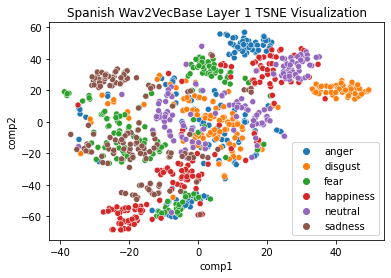

 17%|█▋        | 2/12 [00:14<01:13,  7.32s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


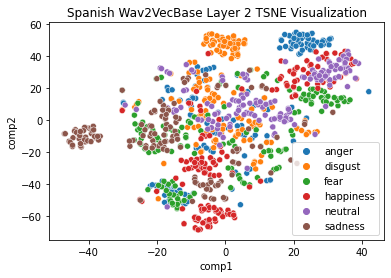

 25%|██▌       | 3/12 [00:25<01:20,  8.92s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


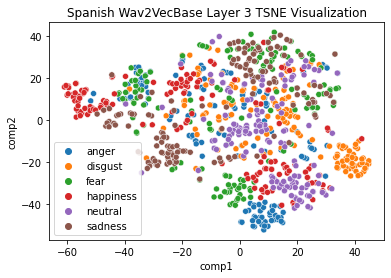

 33%|███▎      | 4/12 [00:32<01:03,  8.00s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


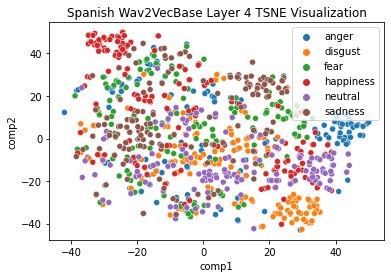

 42%|████▏     | 5/12 [00:38<00:52,  7.49s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


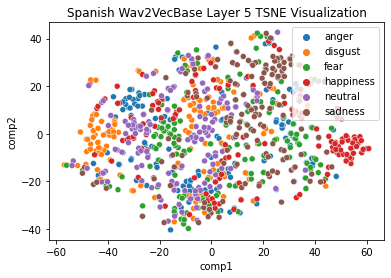

 50%|█████     | 6/12 [00:46<00:44,  7.47s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


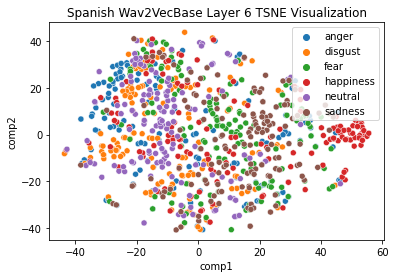

 58%|█████▊    | 7/12 [00:53<00:36,  7.30s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


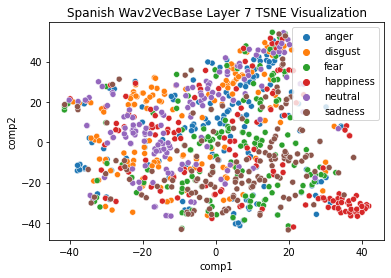

 67%|██████▋   | 8/12 [01:00<00:28,  7.23s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


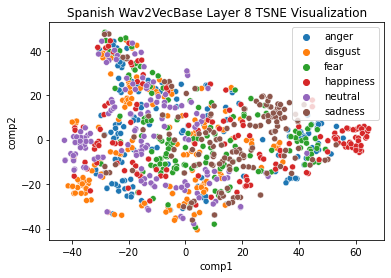

 75%|███████▌  | 9/12 [01:07<00:21,  7.09s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


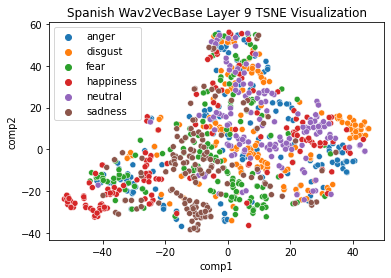

 83%|████████▎ | 10/12 [01:13<00:13,  6.92s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


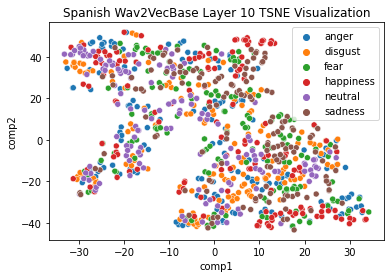

 92%|█████████▏| 11/12 [01:20<00:06,  6.84s/it]/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


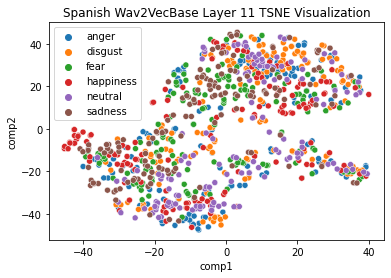

100%|██████████| 12/12 [01:27<00:00,  7.32s/it]


<Figure size 432x288 with 0 Axes>

In [55]:
for layer in tqdm(range(12)):
  audios_cur = [torch.mean(audio, dim=0).tolist() for audio in audios[layer]]
  cate_audios = []
  cate_labels = []

  for i in range(len(audios_cur)):
    cate_audios.append(audios_cur[i])
    cate_labels.append(labels[i])


  data = pd.DataFrame({'Label':cate_labels, 'Features': cate_audios})
  data = data.sort_values('Label', ignore_index=True)
  tsne = TSNE(n_components=2, random_state=4800, perplexity=20)
  output = tsne.fit_transform(data['Features'].tolist())

  df = pd.DataFrame(output, columns=['comp1', 'comp2'])
  sns.scatterplot(x='comp1', y='comp2', hue=data['Label'].tolist(), data=df)
  plt.title(f'Spanish Wav2VecBase Layer {layer} TSNE Visualization')
  plt.show()
  plt.savefig(f'/content/drive/MyDrive/MESD/tsne_wave2vecbase_layer_{layer}.png')

## CNN Model Training

### Model Preparation

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ICASSP3CNN(nn.Module):
    def __init__(self, vocab_size, embed_size=128, hidden_size=512, num_lstm_layers = 2, bidirectional = False, label_size=7):
        super().__init__()
        self.n_layers = num_lstm_layers 
        self.hidden = hidden_size
        self.bidirectional = bidirectional
        
        self.embed = nn.Linear(in_features = vocab_size, out_features = embed_size)

        self.cnn  = nn.Conv1d(embed_size, embed_size, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv1d(embed_size, embed_size, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(embed_size, embed_size, kernel_size=7, padding=3)

        self.batchnorm = nn.BatchNorm1d(3 * embed_size)

        self.lstm = nn.LSTM(input_size = 3 * embed_size, 
                            hidden_size = hidden_size, 
                            num_layers = num_lstm_layers, 
                            bidirectional = bidirectional)

        self.linear = nn.Linear(in_features = 2 * hidden_size if bidirectional else hidden_size, 
                                out_features = label_size)


    def forward(self, x, lengths):
        """
        padded_x: (B,T) padded LongTensor
        """

        input = self.embed(x)

        batch_size = input.size(0)
        input = input.transpose(1,2)    # (B,T,H) -> (B,H,T)

        cnn_output = torch.cat([self.cnn(input), self.cnn2(input), self.cnn3(input)], dim=1)

        input = F.relu(self.batchnorm(cnn_output))

        input = input.transpose(1,2)

        pack_tensor = nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, cn) = self.lstm(pack_tensor)

        if self.bidirectional:
            h_n = hn.view(self.n_layers, 2, batch_size, self.hidden)
            h_n = torch.cat([ h_n[-1, 0,:], h_n[-1,1,:] ], dim = 1)
        else:
            h_n = hn[-1]

        logits = self.linear(h_n)

        return logits

### Split Data

In [62]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [145]:
layer = 6
print("Length of audios",len(audios[layer]))
print("Shape of first:",audios[layer][0].shape)
print("Shape of last:",audios[layer][-1].shape)

Length of audios 862
Shape of first: torch.Size([38, 768])
Shape of last: torch.Size([43, 768])


In [146]:
X_train, X_test, y_train, y_test = train_test_split(audios[layer], 
                                                    list(df['Label']), 
                                                    test_size=0.2, 
                                                    random_state=4800)

train_dataset = MyDataSet(X_train, y_train, cate_dic)
trainloader_args = dict(batch_size=64, shuffle=True)
train_dataloader = DataLoader(train_dataset, **trainloader_args, 
                              collate_fn=collate_indic)

test_dataset = MyDataSet(X_test, y_test, cate_dic)
testloader_args = dict(batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, **testloader_args, 
                             collate_fn=collate_indic)

In [147]:
for batch, data in enumerate(train_dataloader):
    x, length, y = data
    print(batch, x.shape)

0 torch.Size([64, 108, 768])
1 torch.Size([64, 109, 768])
2 torch.Size([64, 100, 768])
3 torch.Size([64, 102, 768])
4 torch.Size([64, 126, 768])
5 torch.Size([64, 60, 768])
6 torch.Size([64, 108, 768])
7 torch.Size([64, 63, 768])
8 torch.Size([64, 62, 768])
9 torch.Size([64, 66, 768])
10 torch.Size([49, 111, 768])


In [148]:
import torch.nn as nn
import torch.nn.functional as F

class ICASSP3CNN(nn.Module):
    def __init__(self, vocab_size, embed_size=128, hidden_size=512, num_lstm_layers = 2, bidirectional = False, label_size=7):
        super().__init__()
        self.n_layers = num_lstm_layers 
        self.hidden = hidden_size
        self.bidirectional = bidirectional
        
        self.embed = nn.Linear(in_features = vocab_size, out_features = embed_size)

        self.cnn  = nn.Conv1d(embed_size, embed_size, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv1d(embed_size, embed_size, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(embed_size, embed_size, kernel_size=7, padding=3)

        self.batchnorm = nn.BatchNorm1d(3 * embed_size)

        self.lstm = nn.LSTM(input_size = 3 * embed_size, 
                            hidden_size = hidden_size, 
                            num_layers = num_lstm_layers, 
                            bidirectional = bidirectional)

        self.linear = nn.Linear(in_features = 2 * hidden_size if bidirectional else hidden_size, 
                                out_features = label_size)


    def forward(self, x, lengths):
        """
        padded_x: (B,T) padded LongTensor
        """

        input = self.embed(x)

        batch_size = input.size(0)
        input = input.transpose(1,2)    # (B,T,H) -> (B,H,T)

        cnn_output = torch.cat([self.cnn(input), self.cnn2(input), self.cnn3(input)], dim=1)

        input = F.relu(self.batchnorm(cnn_output))

        input = input.transpose(1,2)

        pack_tensor = nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, cn) = self.lstm(pack_tensor)

        if self.bidirectional:
            h_n = hn.view(self.n_layers, 2, batch_size, self.hidden)
            h_n = torch.cat([ h_n[-1, 0,:], h_n[-1,1,:] ], dim = 1)
        else:
            h_n = hn[-1]

        logits = self.linear(h_n)

        return logits

### Model Training

In [149]:
from tqdm import tqdm
from torchsummary import summary
import torch.optim as optim

model = ICASSP3CNN(768)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.train()
    for batch, (x, length, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        logits = model(x, length)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.cpu().item()

        #model outputs
        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    train_loss = train_loss/batch_cnt
    train_accuracy = acc_cnt/(acc_cnt+err_cnt)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    
    valid_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.eval()

    for x, lengths, y in test_dataloader:

        x = x.to(device)
        y = y.to(device)

        logits = model(x, lengths)
        loss = criterion(logits, y)
        valid_loss += loss.cpu().item()

        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    valid_loss = valid_loss/batch_cnt
    valid_accuracy = acc_cnt/(acc_cnt+err_cnt)
    valid_accuracies.append(valid_accuracy)
    valid_losses.append(valid_loss)
    
    print(f"epoch:{epoch+1}, train accu:{train_accuracy:.4f},", 
          f"train loss:{train_loss:.2f}, valid accu:{valid_accuracy:.4f},", 
          f"valid loss:{valid_loss:.2f}")

  3%|▎         | 1/30 [01:15<36:15, 75.03s/it]

epoch:1, train accu:0.3033, train loss:1.74, valid accu:0.4046, valid loss:1.42


  7%|▋         | 2/30 [02:20<32:20, 69.29s/it]

epoch:2, train accu:0.5312, train loss:1.15, valid accu:0.5723, valid loss:1.24


 10%|█         | 3/30 [03:25<30:21, 67.48s/it]

epoch:3, train accu:0.6401, train loss:0.87, valid accu:0.5318, valid loss:1.14


 13%|█▎        | 4/30 [04:30<28:50, 66.55s/it]

epoch:4, train accu:0.6909, train loss:0.74, valid accu:0.5260, valid loss:1.14


 17%|█▋        | 5/30 [05:34<27:21, 65.67s/it]

epoch:5, train accu:0.7155, train loss:0.73, valid accu:0.5838, valid loss:1.16


 20%|██        | 6/30 [06:39<26:05, 65.25s/it]

epoch:6, train accu:0.7620, train loss:0.65, valid accu:0.5607, valid loss:1.25


 23%|██▎       | 7/30 [07:42<24:43, 64.49s/it]

epoch:7, train accu:0.8099, train loss:0.50, valid accu:0.5896, valid loss:1.35


 27%|██▋       | 8/30 [08:45<23:27, 63.96s/it]

epoch:8, train accu:0.8549, train loss:0.41, valid accu:0.5838, valid loss:1.47


 30%|███       | 9/30 [09:49<22:28, 64.20s/it]

epoch:9, train accu:0.8795, train loss:0.33, valid accu:0.6936, valid loss:1.05


 33%|███▎      | 10/30 [10:54<21:27, 64.37s/it]

epoch:10, train accu:0.8999, train loss:0.32, valid accu:0.6532, valid loss:1.22


 37%|███▋      | 11/30 [12:00<20:31, 64.82s/it]

epoch:11, train accu:0.9361, train loss:0.21, valid accu:0.6474, valid loss:1.22


 40%|████      | 12/30 [13:04<19:20, 64.49s/it]

epoch:12, train accu:0.9448, train loss:0.18, valid accu:0.6532, valid loss:1.22


 43%|████▎     | 13/30 [14:13<18:43, 66.12s/it]

epoch:13, train accu:0.9521, train loss:0.18, valid accu:0.6185, valid loss:1.42


 47%|████▋     | 14/30 [15:15<17:13, 64.61s/it]

epoch:14, train accu:0.9594, train loss:0.13, valid accu:0.6879, valid loss:1.22


 50%|█████     | 15/30 [16:20<16:10, 64.72s/it]

epoch:15, train accu:0.9536, train loss:0.12, valid accu:0.6821, valid loss:1.25


 53%|█████▎    | 16/30 [17:25<15:07, 64.82s/it]

epoch:16, train accu:0.9608, train loss:0.13, valid accu:0.6474, valid loss:1.63


 57%|█████▋    | 17/30 [18:30<14:04, 64.97s/it]

epoch:17, train accu:0.9550, train loss:0.12, valid accu:0.6705, valid loss:1.47


 60%|██████    | 18/30 [19:36<13:04, 65.41s/it]

epoch:18, train accu:0.9608, train loss:0.11, valid accu:0.6647, valid loss:1.33


 63%|██████▎   | 19/30 [20:43<12:04, 65.89s/it]

epoch:19, train accu:0.9739, train loss:0.09, valid accu:0.6416, valid loss:1.61


 67%|██████▋   | 20/30 [21:48<10:56, 65.65s/it]

epoch:20, train accu:0.9608, train loss:0.15, valid accu:0.6474, valid loss:1.56


 70%|███████   | 21/30 [22:50<09:40, 64.49s/it]

epoch:21, train accu:0.9608, train loss:0.13, valid accu:0.6532, valid loss:1.34


 73%|███████▎  | 22/30 [23:52<08:29, 63.64s/it]

epoch:22, train accu:0.9695, train loss:0.10, valid accu:0.7052, valid loss:1.23


 77%|███████▋  | 23/30 [24:56<07:27, 63.91s/it]

epoch:23, train accu:0.9840, train loss:0.06, valid accu:0.6647, valid loss:1.47


 80%|████████  | 24/30 [26:01<06:25, 64.22s/it]

epoch:24, train accu:0.9811, train loss:0.07, valid accu:0.6358, valid loss:1.56


 83%|████████▎ | 25/30 [27:05<05:19, 63.95s/it]

epoch:25, train accu:0.9768, train loss:0.08, valid accu:0.6243, valid loss:1.76


 87%|████████▋ | 26/30 [28:12<04:19, 64.87s/it]

epoch:26, train accu:0.9579, train loss:0.14, valid accu:0.6532, valid loss:1.59


 90%|█████████ | 27/30 [29:17<03:15, 65.06s/it]

epoch:27, train accu:0.9710, train loss:0.09, valid accu:0.6647, valid loss:1.45


 93%|█████████▎| 28/30 [30:23<02:10, 65.16s/it]

epoch:28, train accu:0.9782, train loss:0.07, valid accu:0.6590, valid loss:1.55


 97%|█████████▋| 29/30 [31:31<01:06, 66.06s/it]

epoch:29, train accu:0.9826, train loss:0.06, valid accu:0.6474, valid loss:1.62


100%|██████████| 30/30 [32:37<00:00, 65.24s/it]

epoch:30, train accu:0.9855, train loss:0.05, valid accu:0.6647, valid loss:1.53


In [150]:
model_path = f'/content/drive/MyDrive/MESD/models/wav2vec_base_{layer}.pth'

torch.save({'epoch':epochs,
            'model_state_dict':model.state_dict(),
            'optimizer_state_dict':optimizer.state_dict()},
            model_path)

metadata = pd.DataFrame({'epoch':range(epochs), 'train loss':train_losses, 
                         'valid loss':valid_losses, 'train accu':train_accuracies, 
                         'valid_accu':valid_accuracies})
metadata.to_csv(f'/content/drive/MyDrive/MESD/results/wav2vecbase_{layer}.csv ', index=False)

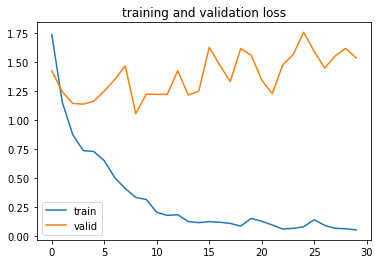

In [151]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses, label='train')
plt.plot(range(epochs), valid_losses, label='valid')
plt.legend()
plt.title('training and validation loss')
plt.show()

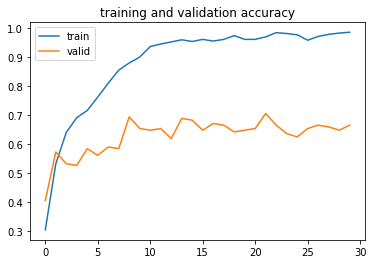

In [152]:
plt.plot(range(epochs), train_accuracies, label='train')
plt.plot(range(epochs), valid_accuracies, label='valid')
plt.legend()
plt.title('training and validation accuracy')
plt.show()

In [153]:
from sklearn.metrics import confusion_matrix

y_pred = []
y_true = []

for inputs, lengths, labels in test_dataloader:
    output = model(inputs, lengths) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction

    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

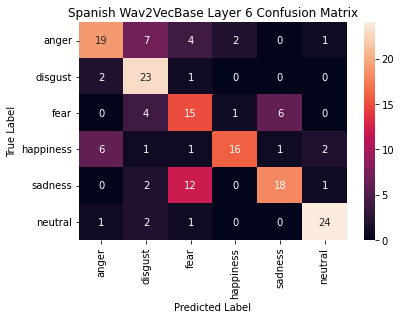

In [154]:
import numpy as np
cf = confusion_matrix(y_true, y_pred)
# df = pd.read_pickle(DF_PATH)
classes = list(df['Label'].unique())
df_cm = pd.DataFrame(cf, index = [i for i in classes],
                     columns = [i for i in classes])
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Spanish Wav2VecBase Layer {layer} Confusion Matrix')
plt.savefig(f'/content/drive/MyDrive/MESD/results/confusion_wave2vecbase_{layer}.png')